<a href="https://colab.research.google.com/github/labonisarkar/IoT/blob/master/IoTNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
!wget https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip

--2020-07-03 04:14:00--  https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip [following]
--2020-07-03 04:14:00--  https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4424482 (4.2M) [application/zip]
Saving to: ‘mainSimulationAccessTraces.zip’

mainSimulationAcces 100%[===================>]   4.22M  --.-KB/s    in 0.1s    

2020-07-03 04:14:01 (34.9 MB/s) - ‘mainSimulationAcce

In [2]:
!unzip mainSimulationAccessTraces.zip

Archive:  mainSimulationAccessTraces.zip
  inflating: mainSimulationAccessTraces.csv  


# Importing Libraries

In [3]:
import matplotlib.pyplot as plt # Library for Data Visulization
import pandas as pd # Library for DataFrame 
import seaborn as sns #For Data Visulization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
iot = pd.read_csv('mainSimulationAccessTraces.csv')

# Data PreProcessing
### Change the name of Iot Lables in Simpler form
Example: anomalous(DoSattack)  ---> DoS Attack

In [5]:
iot['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

In [6]:
normality = iot['normality'].map({'normal': 'Normal', 'anomalous(DoSattack)':'DoS Attack', 'anomalous(scan)':'Scan',
       'anomalous(malitiousControl)':'Malitious Control', 'anomalous(malitiousOperation)' : 'Malitious Operation',
       'anomalous(spying)':'Spying', 'anomalous(dataProbing)':'Data Probing', 'anomalous(wrongSetUp)':'Wrong SetUp'})


In [7]:
iot['normality'] = normality
iot['normality'].value_counts()

Normal                 347935
DoS Attack               5780
Scan                     1547
Malitious Control         889
Malitious Operation       805
Spying                    532
Data Probing              342
Wrong SetUp               122
Name: normality, dtype: int64

# Visualize Missing Values
#### The Missing values are shown in block for all the column in the plot.The Black portion shows missing valus in the Data.

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64


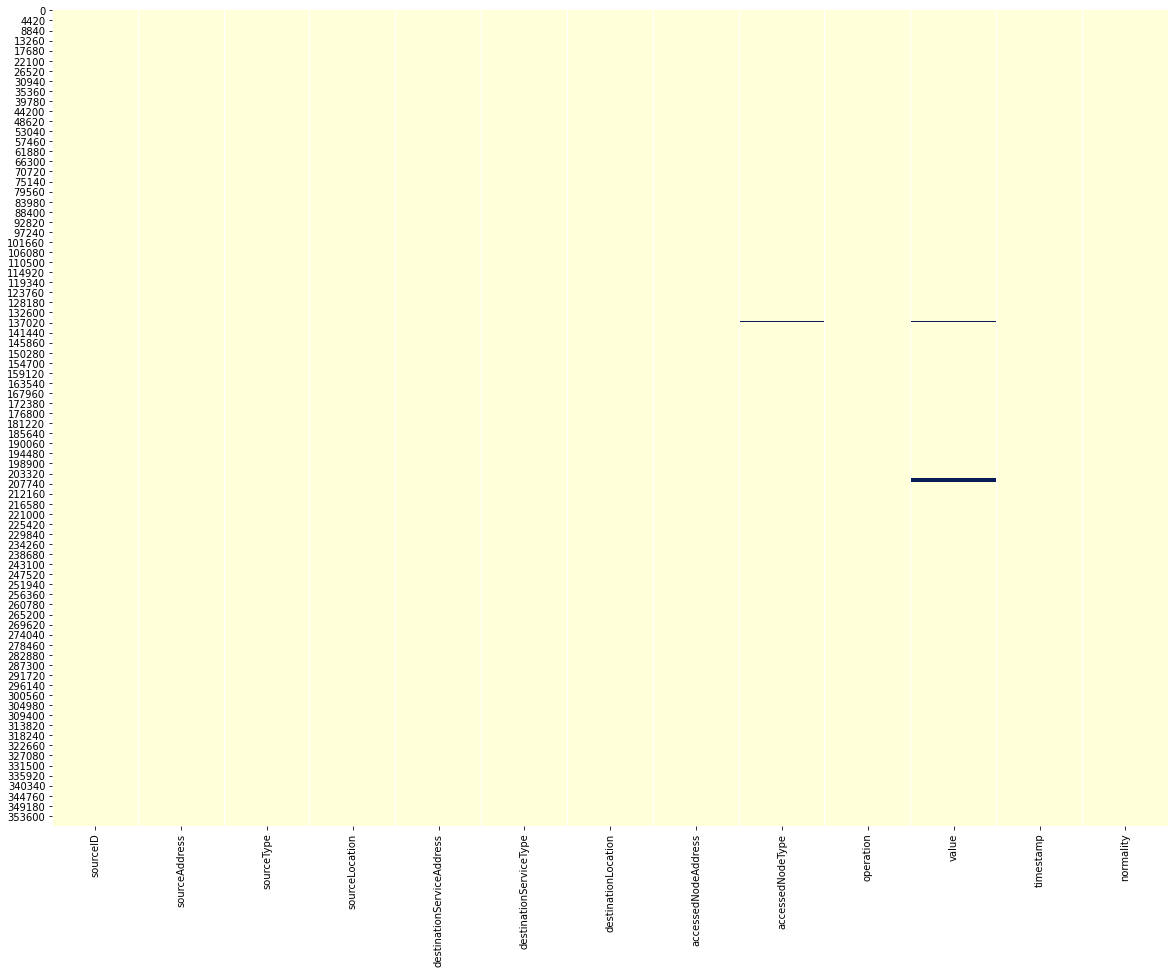

In [8]:
#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

In [9]:
iot.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

# comment
- The Result shows The Columns **Values** and **accessedNodeType** have 2050 and 148 missing values
- The missing values are then replaced by fill forword method for values and accessedNodeType with '/Unknown'

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


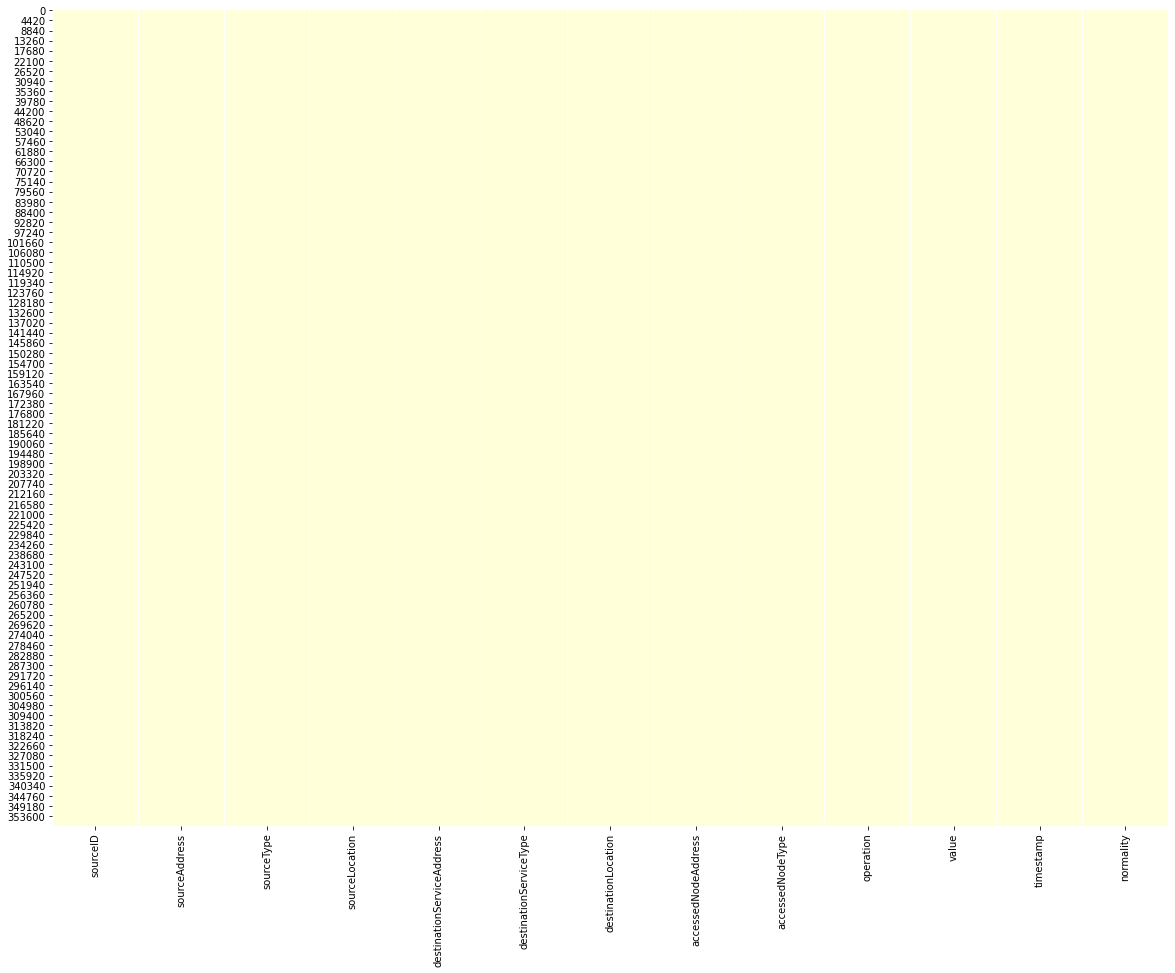

In [10]:

iot['value'].fillna( method ='ffill', inplace = True) 
iot['accessedNodeType'] = iot['accessedNodeType'].fillna(value='/Unknown')

#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

# Ploting the Type of Attacks

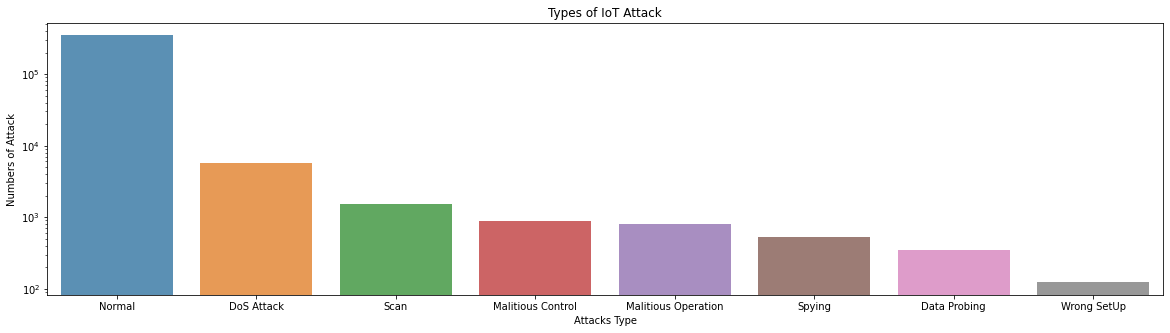

In [11]:
#ploting the bar graph of Types of 
plt.figure(figsize=(20,5))
attack_count = iot['normality'].value_counts()
g = sns.barplot(attack_count.index,attack_count.values,alpha=0.8)
g.set_yscale("log")
plt.title('Types of IoT Attack')
plt.xlabel('Attacks Type')
plt.ylabel('Numbers of Attack')
plt.show()

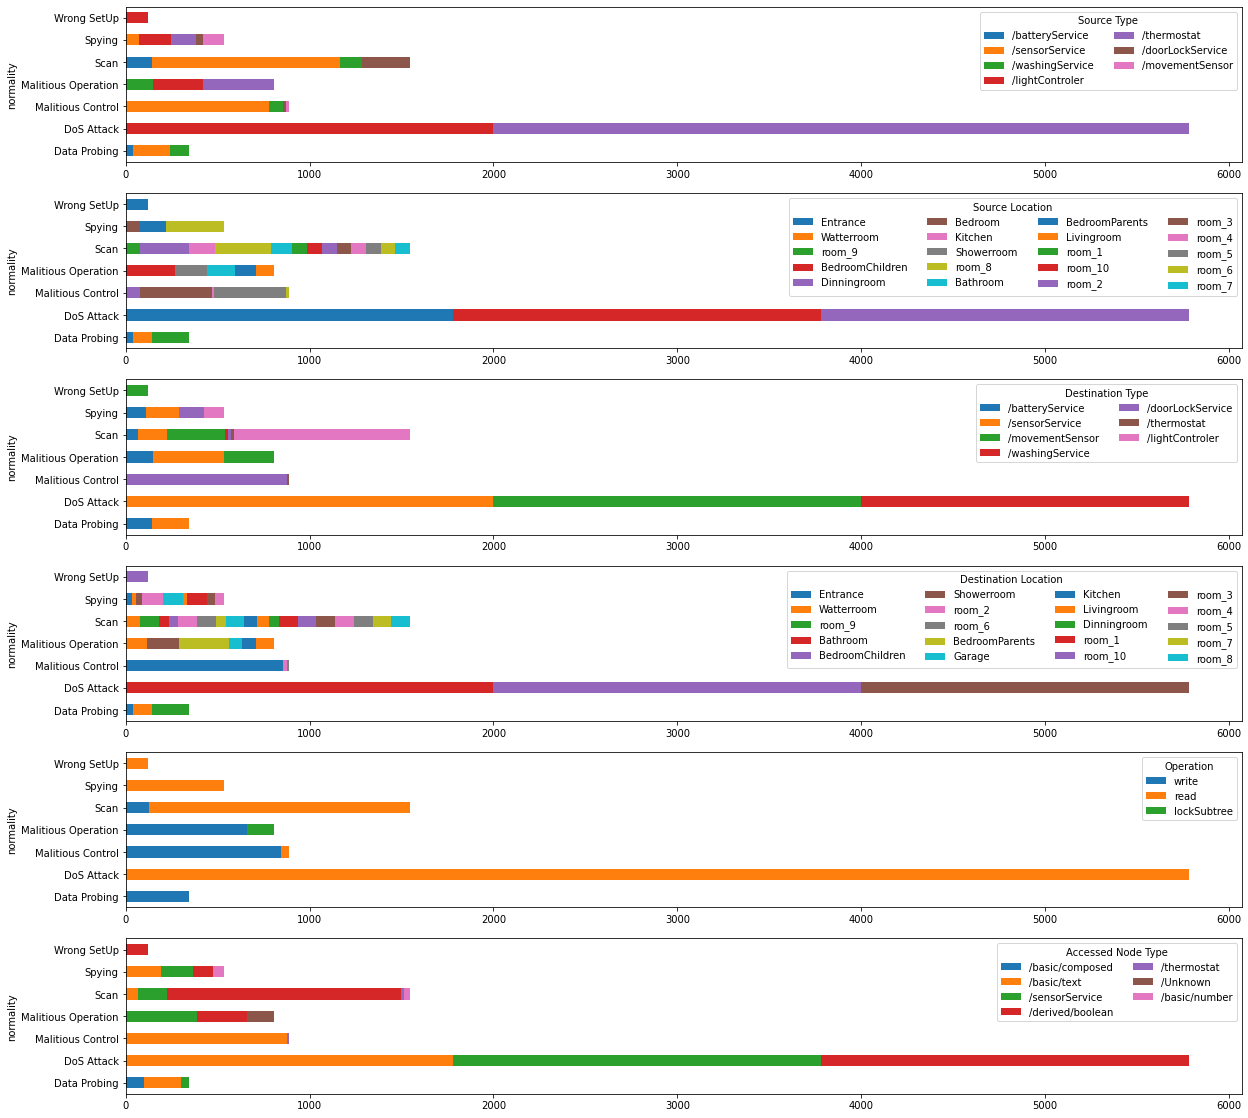

In [12]:

fig = plt.figure()

# Divide the figure into a 4x1 grid, and give me the first section
ax1 = fig.add_subplot(611)

# Divide the figure into a 4x1 grid, and give me the second section
ax2 = fig.add_subplot(612)

# Divide the figure into a 4x1 grid, and give me the first section
ax3 = fig.add_subplot(613)

# Divide the figure into a 4x1 grid, and give me the second section
ax4 = fig.add_subplot(614)

# Divide the figure into a 4x1 grid, and give me the first section
ax5 = fig.add_subplot(615)

# Divide the figure into a 4x1 grid, and give me the second section
ax6 = fig.add_subplot(616)


iot.groupby(['normality','sourceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax1)
iot.groupby(['normality','sourceLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax2)
iot.groupby(['normality','destinationServiceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax3)
iot.groupby(['normality','destinationLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax4)
iot.groupby(['normality','operation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax5)
iot.groupby(['normality','accessedNodeType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax6)
ax1.legend(ncol=2,title='Source Type')
ax2.legend(ncol=4,title='Source Location')
ax3.legend(ncol=2,title='Destination Type')
ax4.legend(ncol=4,title='Destination Location')
ax5.legend(title='Operation')
ax6.legend(ncol=2,title='Accessed Node Type')

# Data Pre Processing
- The Value Columns show some anomalies in the data, The next steps we cleans the valus data and replace
- Example : none to 0 , false to 0 , true to 1 , twenty to 20
- Next we change the data type with string to numaric 

In [13]:
iot[['value']][iot['value'].str.isalnum()]['value'].value_counts()

1         57066
0         50293
false     25974
true      14540
7         10038
10         9636
6          8540
5          8494
2          8444
4          8437
9          8433
8          8430
3          8428
twenty      200
none        106
Name: value, dtype: int64

In [14]:
#Map the Non-Numeric Value to Corresponding values
value_map = {'none':'0','false':'0','true':'1','twenty':'20'}
iot['value'] = iot['value'].map(value_map).fillna(iot['value'])

In [15]:
# covert the data values to numeric
iot['value'] = pd.to_numeric(iot['value'], errors='coerce')

In [16]:
print(iot.isnull().sum())

sourceID                      0
sourceAddress                 0
sourceType                    0
sourceLocation                0
destinationServiceAddress     0
destinationServiceType        0
destinationLocation           0
accessedNodeAddress           0
accessedNodeType              0
operation                     0
value                        11
timestamp                     0
normality                     0
dtype: int64


In [17]:
iot.dropna(inplace=True)
print(iot.isnull().sum())

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


## Feature Genaration

In [18]:
#Conver columns to type to category
def to_category(dataframe,columns=[],type = 'None'):
    if type == 'object':
        columns = list(dataframe.select_dtypes(type).dtypes.index)        
    return dataframe[columns].apply(lambda x: x.astype('category'))

# Function OneHot Coding:
def convert_to_onehot(dataframe,feature_list,drop_first=True):
    """Covert all columns in the list using One Hot Method"""
    res = pd.DataFrame(index=dataframe.index)
    for feature in feature_list:
        dummies = pd.get_dummies(dataframe[[feature]])
        res = pd.concat([res,dummies],axis=1)
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res


#label Encoder for categorical data
def label_encoder(dataframe,columns,drop_first=True,prefix='_label'):
    """convert categorical data with label encoder"""
    from sklearn.preprocessing import LabelEncoder
    res = pd.DataFrame(index=dataframe.index)
    for col in columns:
        # creating instance of labelencoder
        labelencoder = LabelEncoder()
        res[col+prefix] = labelencoder.fit_transform(dataframe[col])
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res

In [19]:
iot.dtypes

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float64
timestamp                      int64
normality                     object
dtype: object

In [20]:
columns = to_category(iot,type = 'object').columns
iot[columns] = to_category(iot,type = 'object')
iot.dtypes

sourceID                     category
sourceAddress                category
sourceType                   category
sourceLocation               category
destinationServiceAddress    category
destinationServiceType       category
destinationLocation          category
accessedNodeAddress          category
accessedNodeType             category
operation                    category
value                         float64
timestamp                       int64
normality                    category
dtype: object

In [21]:
iot.describe()

,value,timestamp
count,3.579410e+05,3.579410e+05
mean,2.447954e+09,1.520078e+12
std,6.097456e+10,2.465573e+07
min,0.000000e+00,1.520032e+12
25%,1.000000e+00,1.520057e+12
50%,5.000000e+00,1.520080e+12
75%,1.982230e+01,1.520099e+12
max,1.521225e+12,1.520118e+12


In [22]:
iot.select_dtypes('category').describe()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,normality
count,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941
unique,84,89,8,21,85,8,21,170,13,4,8
top,washingmachine1,/agent6/washingmachine1,/lightControler,Garage,/agent11/battery4,/sensorService,Garage,/agent11/battery4/charge,/sensorService,read,Normal
freq,17908,17908,135775,39499,27643,130313,57100,19031,130155,248061,347924


In [23]:
#unique_values = iot.select_dtypes('category').describe().loc['unique',:].to_frame()
#label_col = unique_values[unique_values > 21].dropna().index
#hot_col = unique_values[unique_values <= 21].dropna().index

iot_feature_col = ['sourceType', 'sourceLocation', 'destinationServiceType', 'destinationLocation', 'accessedNodeType', 'operation','sourceID', 'sourceAddress', 'destinationServiceAddress', 'accessedNodeAddress']
target = ['normality']

In [24]:
iot.drop('timestamp',axis=1,inplace=True)

In [25]:
iot_feature = pd.concat([label_encoder(iot,iot_feature_col),iot[['value']]],axis=1)

In [26]:
iot[['normality']]

,normality
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
357947,Normal
357948,Normal
357949,Normal
357950,Normal


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(iot_feature)

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(iot['normality'].values).reshape(-1,1)

In [28]:
attack_class = list(labelencoder_y.classes_)
list(labelencoder_y.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7]))

['Data Probing',
 'DoS Attack',
 'Malitious Control',
 'Malitious Operation',
 'Normal',
 'Scan',
 'Spying',
 'Wrong SetUp']

In [29]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
y[1]

array([0, 0, 0, 0, 1, 0, 0, 0])

# Machine Learning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.multiclass import OneVsRestClassifier

In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 123)

In [38]:
# ploting Auc Ruc Curve
def add_results(name,y_test,y_pred):
  results[name] = {}
  results[name]['Accuracy Score'] = round(accuracy_score(y_test,y_pred),4)
  results[name]['Precision Score'] = round(precision_score(y_test,y_pred,average='weighted'),4)
  results[name]['Recall Score'] = round(recall_score(y_test,y_pred,average='weighted'),4)
  results[name]['F1 Score'] = round(f1_score(y_test,y_pred,average='weighted'),4)
  #print(results[name])
  return results[name]

In [33]:
#ROC AUC plot

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def plot_roc_curve(y_score,y_test,name="RoC Curve",n_classes = 8):
  fpr = dict()
  tpr = dict()
  lw=2
  roc_auc = dict()
  attack_class = ['Data Prob', 'DoS', 'Mal. Cont.','Mal. Op.', 'Normal', 'Scan', 'Spying', 'W. SetUp']
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  #print(roc_auc)
  #plot
  classes = attack_class
  plt.figure(figsize=(7,6))
  ax=plt.subplot(111)
  colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xticks(fontsize=11,weight='bold')
  plt.yticks(fontsize=11,weight='bold')
  plt.setp(ax.spines.values(), linewidth=2)
  ax.xaxis.set_tick_params(width=2)
  ax.yaxis.set_tick_params(width=2)
  plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
  plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
  plt.legend(loc="lower right")
  plt.savefig(name)


In [34]:
from sklearn.metrics import classification_report

In [42]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred,name):
  name = name + "__cfm"
  conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  labels = ['Data Prob.', 'DoS', 'Mal. Cont.','Mal. Op.', 'Normal', 'Scan', 'Spying', 'W. SetUp']
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  plt.savefig(name)



In [44]:
# All Machine Learning Code Results
results = {}

# K Nearest Neighbor(KNN)
The Neighbors-based classification is a  works on pricipal of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data.In this Classification method, nearest neighbors of each point is computed from a simple majority vote of the: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. KNeighborsClassifier implements learning based on the  k nearest neighbors of each query point, where k is an integer value specified by the user.

In [45]:
name = "KNeighborsClassifier"

from sklearn.neighbors import KNeighborsClassifier
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors= 8))

knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9944,
 'F1 Score': 0.9938,
 'Precision Score': 0.9944,
 'Recall Score': 0.9944}

In [46]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       1.00      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       0.99      1.00      1.00       321
             Spying       0.99      1.00      0.99        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


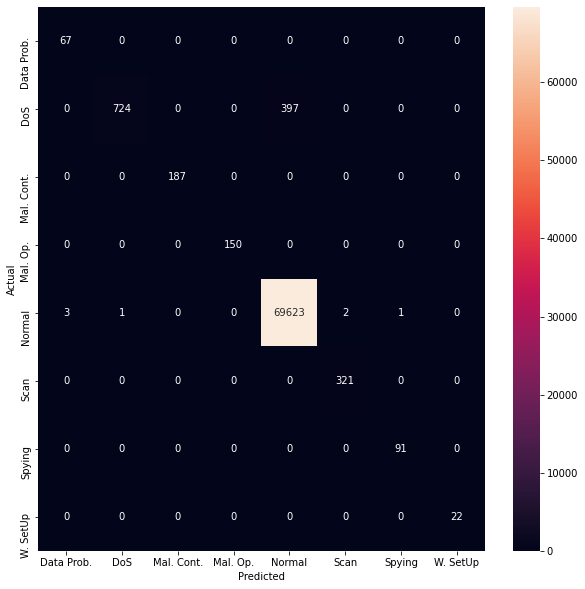

<Figure size 432x288 with 0 Axes>

In [47]:
plot_confusion_matrix(y_test, y_pred,name)

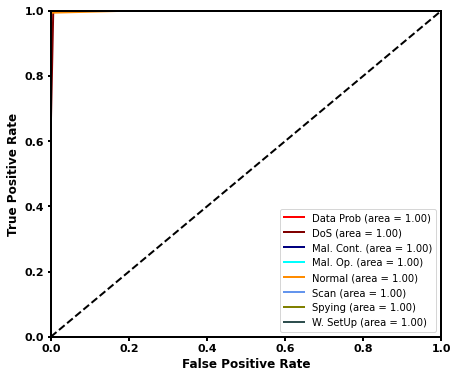

In [48]:
y_score = knn.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# Decision Tree
**A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value). A DT generally starts with a single node and then it branches into possible outcomes. Each of these outcomes lead to additional nodes, which branch off into other instances. So from there, it became a tree-like shape; in other words, a flowchart-like structure. Considering a binary tree, where a parent node is split into two children node a left child and a right child.**

L. Breiman, J. Friedman, R. Olshen, and C. Stone, “Classification and Regression Trees”, Wadsworth, Belmont, CA, 1984.

In [49]:
name = "DecisionTreeClassifier"

from sklearn.tree import DecisionTreeClassifier
dtree = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy", max_depth = 10))
dtree.fit(X_train,y_train)
y_pred  = dtree.predict(X_test)

add_results("DecisionTreeClassifier",y_test,y_pred)

{'Accuracy Score': 0.9942,
 'F1 Score': 0.9936,
 'Precision Score': 0.994,
 'Recall Score': 0.9942}

In [50]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       1.00      1.00      1.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



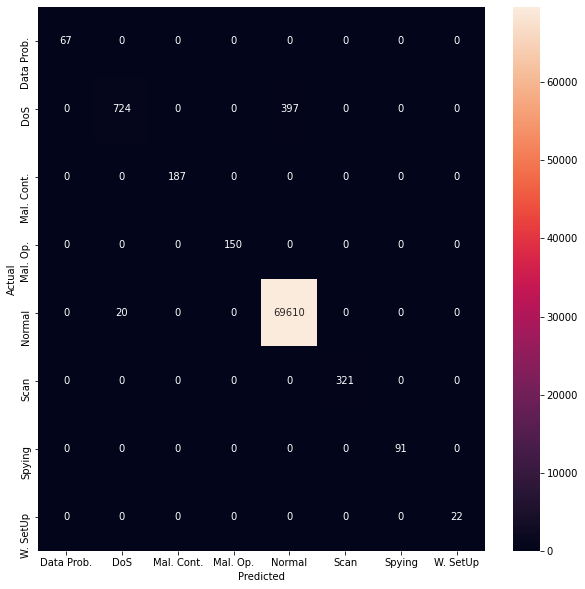

<Figure size 432x288 with 0 Axes>

In [51]:
plot_confusion_matrix(y_test, y_pred,name)

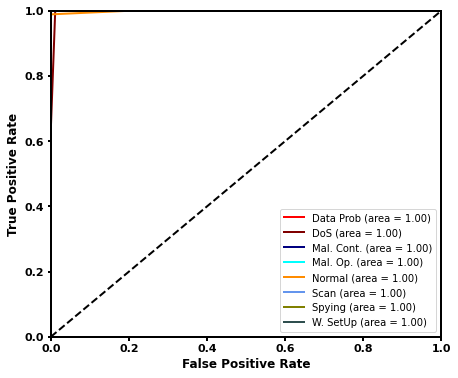

In [52]:
y_score = dtree.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# SVM : Linear SVC
**A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. The figure below shows the decision function for a linearly separable problem, with three samples on the margin boundaries, called “support vectors”.LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer**

Crammer and Singer On the Algorithmic Implementation ofMulticlass Kernel-based Vector Machines, JMLR 2001.

In [53]:
name = "LinearSVC"

from sklearn.svm import LinearSVC
lsvc = OneVsRestClassifier(LinearSVC())
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

add_results(name,y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

{'Accuracy Score': 0.9819,
 'F1 Score': 0.982,
 'Precision Score': 0.9812,
 'Recall Score': 0.9869}

In [54]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      0.61      0.76        67
         DoS Attack       0.96      0.65      0.77      1121
  Malitious Control       0.94      0.94      0.94       187
Malitious Operation       1.00      0.47      0.64       150
             Normal       0.98      1.00      0.99     69630
               Scan       1.00      0.19      0.31       321
             Spying       0.00      0.00      0.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.98      0.99      0.98     71589
          macro avg       0.86      0.61      0.68     71589
       weighted avg       0.98      0.99      0.98     71589
        samples avg       0.98      0.99      0.99     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


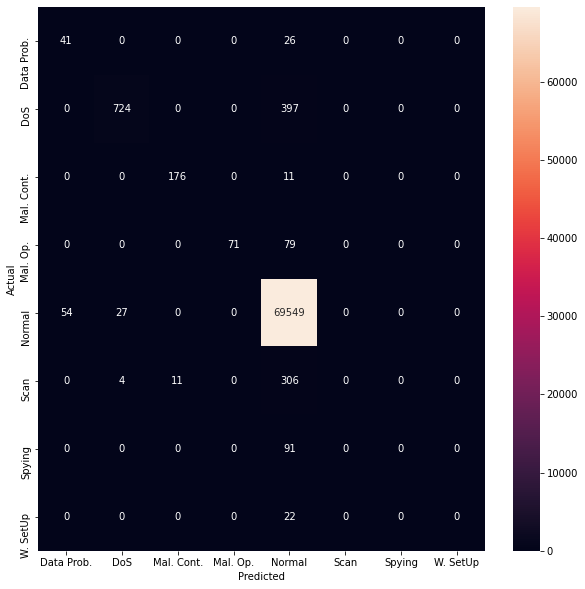

<Figure size 432x288 with 0 Axes>

In [55]:
plot_confusion_matrix(y_test, y_pred,name)

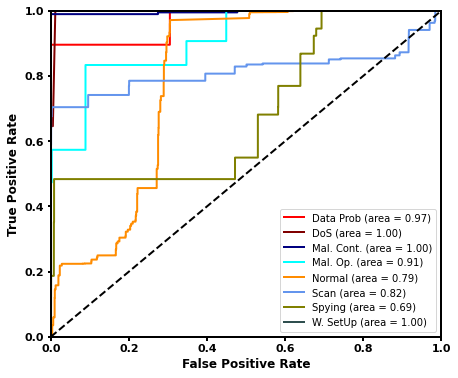

In [56]:
y_score = lsvc.decision_function(X_test)
plot_roc_curve(y_score,y_test,name)

# Random Forest Classifier

**Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object. Many decision trees ensemble together to form a random forest, and it predicts by averaging the predictions of each component tree. It usually has much better predictive accuracy than a single decision tree. In general, the more trees in the forest the more robust the forest looks.**

Ho T.K. Proceedings of the third international conference on Document analysis and recognition, 1995, 1, IEEE (1995), pp. 278-282

In [57]:
name = "RandomForestClassifier"

from sklearn.ensemble import RandomForestClassifier
rfc = OneVsRestClassifier(RandomForestClassifier())
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9942,
 'F1 Score': 0.9936,
 'Precision Score': 0.994,
 'Recall Score': 0.9942}

In [58]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       1.00      1.00      1.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



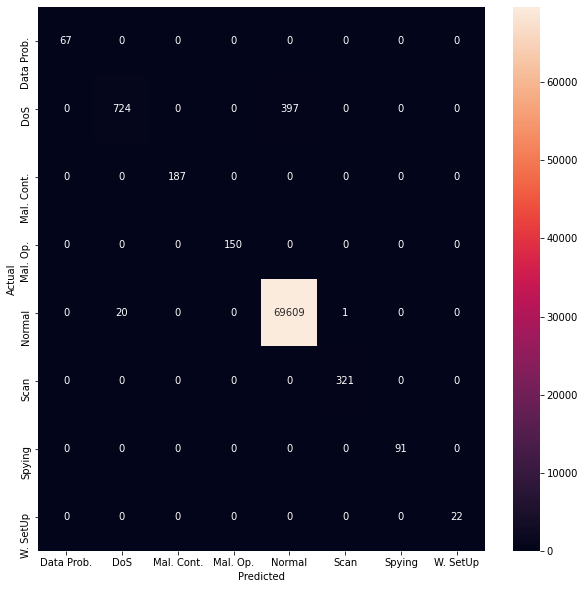

<Figure size 432x288 with 0 Axes>

In [59]:
plot_confusion_matrix(y_test, y_pred,name)

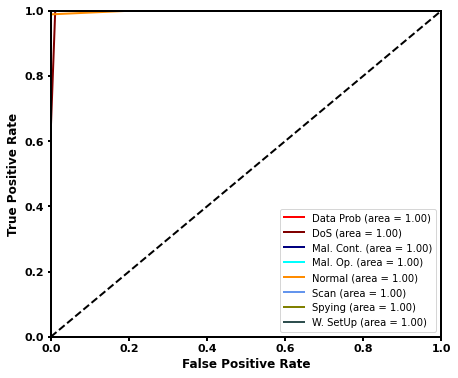

In [60]:
y_score = rfc.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# ExtraTreeClassifier
**ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits.**

P. Geurts, D. Ernst., and L. Wehenkel, “Extremely randomized trees”, Machine Learning, 63(1), 3-42, 2006.

In [61]:
name = "Extra Tree"

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = OneVsRestClassifier(BaggingClassifier(ExtraTreeClassifier(random_state=0), random_state=0))

extra_tree.fit(X_train, y_train) 
y_pred = extra_tree.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9942,
 'F1 Score': 0.9936,
 'Precision Score': 0.994,
 'Recall Score': 0.9942}

In [62]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       1.00      1.00      1.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



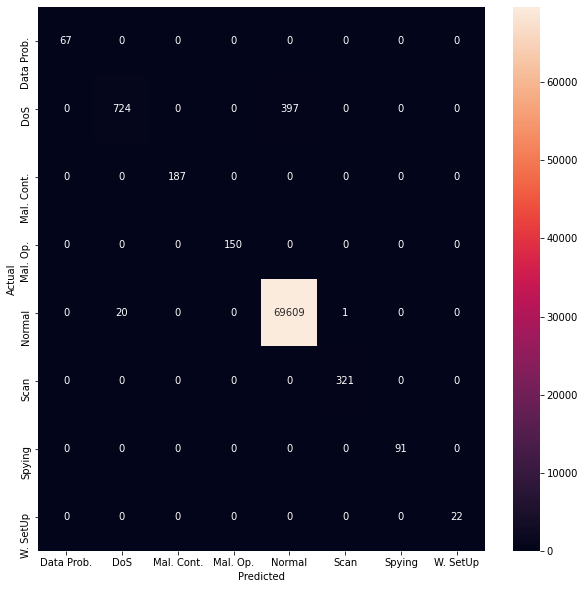

<Figure size 432x288 with 0 Axes>

In [63]:
plot_confusion_matrix(y_test, y_pred,name)

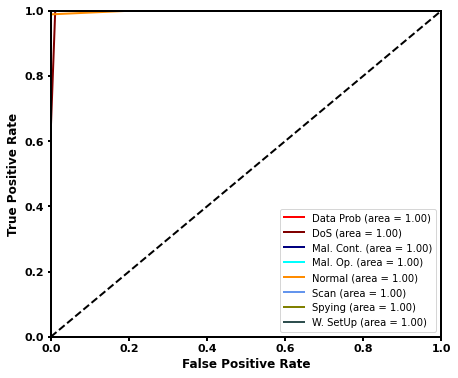

In [64]:
y_score = extra_tree.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)


  # BernoulliNB
  **A Naive Bayes classifier is a probabilistic model that is based on the core concepts of Bayes theorem of probability. BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).**

A. McCallum and K. Nigam (1998). A comparison of event models for Naive Bayes text classification. Proc. AAAI/ICML-98 Workshop on Learning for Text Categorization, pp. 41-48.

In [65]:
name = 'BernoulliNB'

from sklearn.naive_bayes import BernoulliNB

berNB = OneVsRestClassifier(BernoulliNB())

berNB.fit(X_train, y_train) 
y_pred = berNB.predict(X_test)

add_results(name,y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy Score': 0.9604,
 'F1 Score': 0.9599,
 'Precision Score': 0.9464,
 'Recall Score': 0.975}

In [66]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

       Data Probing       0.00      0.00      0.00        67
         DoS Attack       0.00      0.00      0.00      1121
  Malitious Control       0.16      0.90      0.27       187
Malitious Operation       0.00      0.00      0.00       150
             Normal       0.97      1.00      0.99     69630
               Scan       0.00      0.00      0.00       321
             Spying       0.00      0.00      0.00        91
        Wrong SetUp       0.00      0.00      0.00        22

          micro avg       0.96      0.97      0.97     71589
          macro avg       0.14      0.24      0.16     71589
       weighted avg       0.95      0.97      0.96     71589
        samples avg       0.97      0.97      0.97     71589



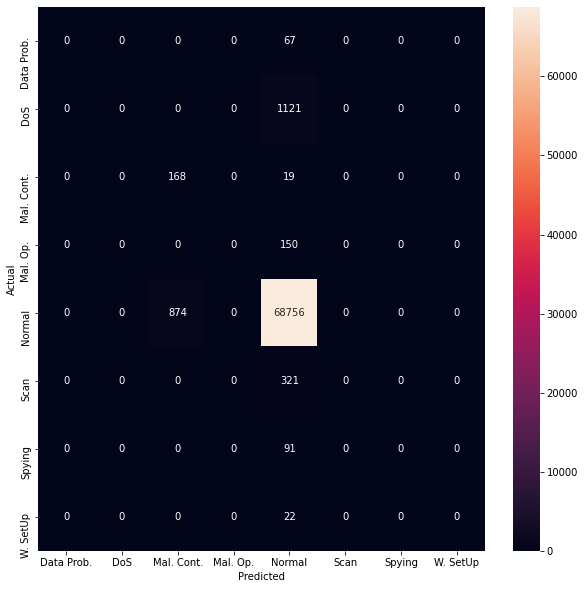

<Figure size 432x288 with 0 Axes>

In [67]:
plot_confusion_matrix(y_test, y_pred,name)

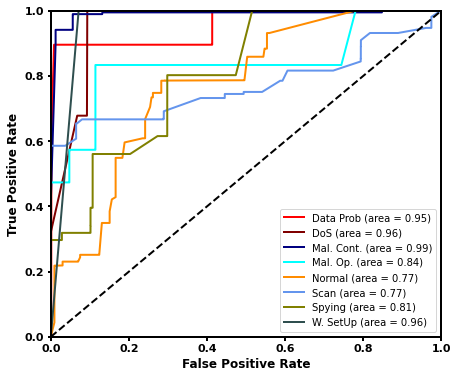

In [68]:
y_score = berNB.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# GaussianNB
**The Gaussian Naive Bayes is one classifier model. Beside the Gaussian Naive Bayes there are also existing the Multinomial naive Bayes and the Bernoulli naive Bayes. I picked the Gaussian Naive Bayes because it is the simplest and the most popular one.GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.**

A. McCallum and K. Nigam (1998). A comparison of event models for Naive Bayes text classification. Proc. AAAI/ICML-98 Workshop on Learning for Text Categorization, pp. 41-48.

In [69]:
 name = "GaussianNB"

from sklearn.naive_bayes import GaussianNB

gauNB = OneVsRestClassifier(GaussianNB())

gauNB.fit(X_train, y_train) 
y_pred = gauNB.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.0004,
 'F1 Score': 0.9586,
 'Precision Score': 0.9579,
 'Recall Score': 0.9823}

In [70]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       0.00      0.90      0.01        67
         DoS Attack       0.07      1.00      0.14      1121
  Malitious Control       0.04      0.97      0.08       187
Malitious Operation       0.00      1.00      0.01       150
             Normal       0.98      0.98      0.98     69630
               Scan       0.01      0.91      0.01       321
             Spying       0.00      1.00      0.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.28      0.98      0.44     71589
          macro avg       0.26      0.97      0.28     71589
       weighted avg       0.96      0.98      0.96     71589
        samples avg       0.30      0.98      0.45     71589



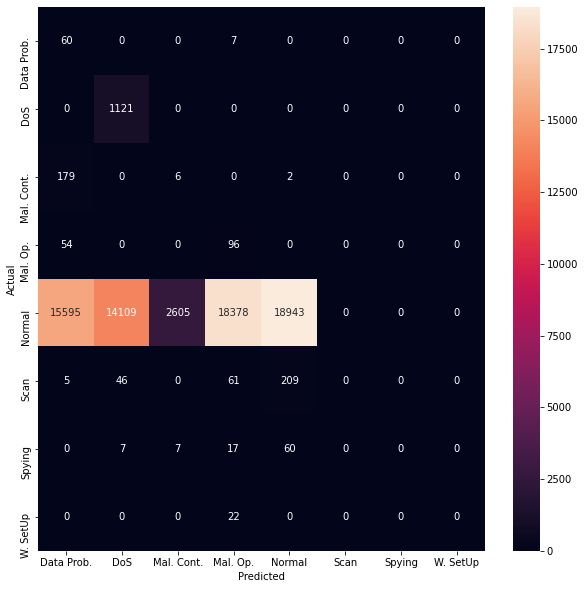

<Figure size 432x288 with 0 Axes>

In [71]:
plot_confusion_matrix(y_test, y_pred,name)

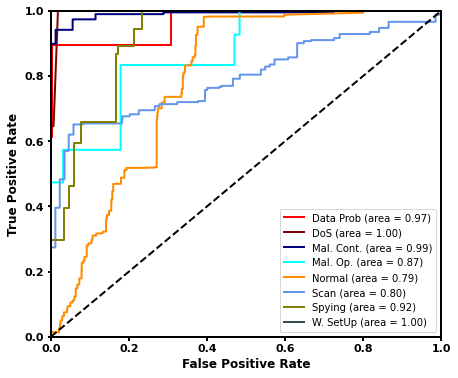

In [72]:
y_score = gauNB.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# MLPClassifier
 **Multilayer perceptrons train on a set of input-output pairs and learn to model the correlation (or dependencies) between those inputs and outputs. Training involves adjusting the parameters, or the weights and biases, of the model in order to minimize error. Backpropagation is used to make those weigh and bias adjustments relative to the error, and the error itself can be measured in a variety of ways, including by root mean squared error (RMSE). An MLP can be thought of, therefore, as a deep artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP**

Hinton, Geoffrey E. “Connectionist learning procedures.” Artificial intelligence 40.1 (1989): 185-234.



In [73]:
name = "MLPClassifier"

from sklearn.neural_network import MLPClassifier

mlp = OneVsRestClassifier(MLPClassifier())

mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9942,
 'F1 Score': 0.9936,
 'Precision Score': 0.9941,
 'Recall Score': 0.9942}

In [74]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      1.00      1.00        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       1.00      1.00      1.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       1.00      0.96      0.97     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



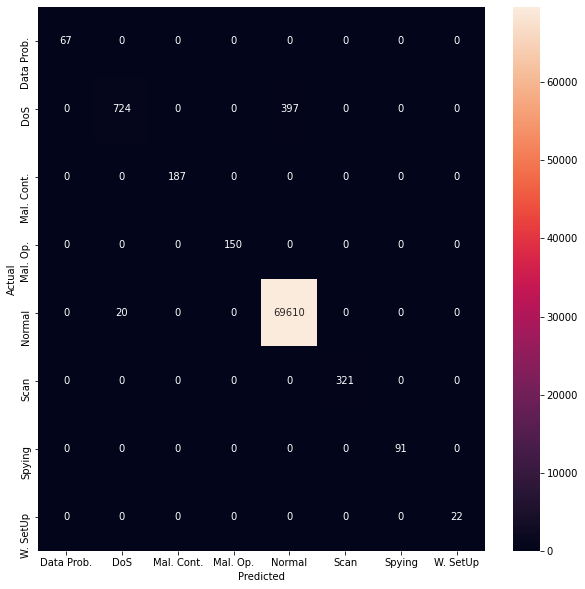

<Figure size 432x288 with 0 Axes>

In [75]:
plot_confusion_matrix(y_test, y_pred,name)

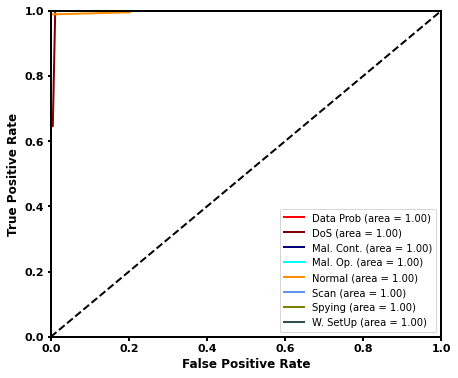

In [76]:
y_score = mlp.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# Gradient Boosting Classifier
**Gradient Boosting works by sequentially adding the previous predictors underfitted predictions to the ensemble, ensuring the erros made previously are corrected. Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology. Gradient boosting involves three elements: A loss function to be optimized, A weak learner to make predictions, An additive model to add weak learners to minimize the loss function.**

J. Friedman, Greedy Function Approximation: A Gradient Boosting Machine, The Annals of Statistics, Vol. 29, No. 5, 2001.

In [77]:
name ="GradientBoostingClassifier"

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

grdB = OneVsRestClassifier(GradientBoostingClassifier(random_state=0))

grdB.fit(X_train, y_train) 
y_pred = grdB.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9916,
 'F1 Score': 0.9923,
 'Precision Score': 0.9919,
 'Recall Score': 0.9937}

In [78]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       0.91      1.00      0.95        67
         DoS Attack       0.97      0.65      0.78      1121
  Malitious Control       1.00      1.00      1.00       187
Malitious Operation       1.00      1.00      1.00       150
             Normal       0.99      1.00      1.00     69630
               Scan       1.00      1.00      1.00       321
             Spying       1.00      0.70      0.83        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.99      0.99      0.99     71589
          macro avg       0.98      0.92      0.94     71589
       weighted avg       0.99      0.99      0.99     71589
        samples avg       0.99      0.99      0.99     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


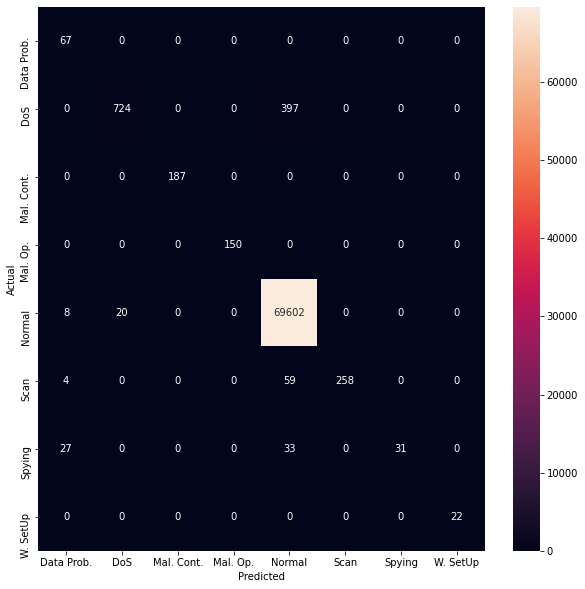

<Figure size 432x288 with 0 Axes>

In [79]:
plot_confusion_matrix(y_test, y_pred,name)

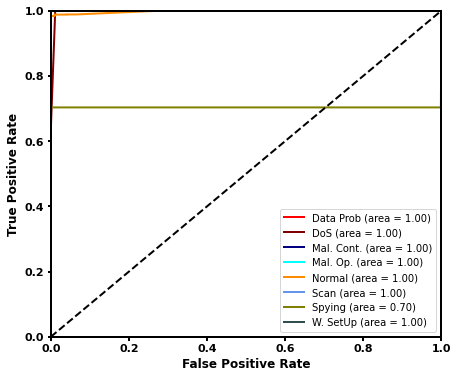

In [80]:
y_score = grdB.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# Gaussian Process Classifier
The Gaussian Process Classifier implements Gaussian processes (GP) for classification purposes, more specifically for probabilistic classification, where test predictions take the form of class probabilities. Gaussian Process Classifier places a GP prior on a latent function , which is then squashed through a link function to obtain the probabilistic classification. The latent function  is a so-called nuisance function, whose values are not observed and are not relevant by themselves. Its purpose is to allow a convenient formulation of the model, and  is removed (integrated out) during prediction. GaussianProcessClassifier implements the logistic link function, for which the integral cannot be computed analytically but is easily approximated in the binary case.

Carl Eduard Rasmussen and Christopher K.I. Williams, “Gaussian Processes for Machine Learning”, MIT Press 2006, 

In [81]:
name = "LogisticRegression"

from sklearn.linear_model import LogisticRegression

logR =  OneVsRestClassifier(LogisticRegression())

logR.fit(X_train, y_train) 
y_pred = logR.predict(X_test)

add_results(name,y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy Score': 0.9823,
 'F1 Score': 0.9836,
 'Precision Score': 0.9819,
 'Recall Score': 0.9879}

In [82]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

       Data Probing       1.00      0.61      0.76        67
         DoS Attack       0.96      0.65      0.77      1121
  Malitious Control       0.99      0.94      0.96       187
Malitious Operation       1.00      0.47      0.64       150
             Normal       0.98      1.00      0.99     69630
               Scan       1.00      0.44      0.61       321
             Spying       0.00      0.00      0.00        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.98      0.99      0.99     71589
          macro avg       0.87      0.64      0.72     71589
       weighted avg       0.98      0.99      0.98     71589
        samples avg       0.99      0.99      0.99     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


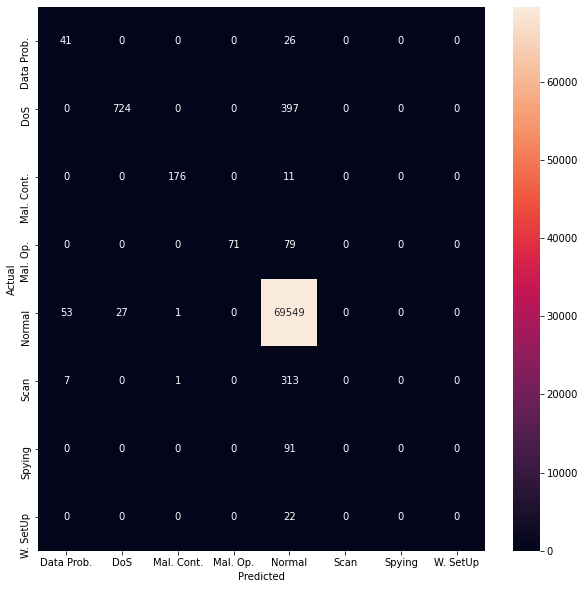

<Figure size 432x288 with 0 Axes>

In [83]:
plot_confusion_matrix(y_test, y_pred,name)

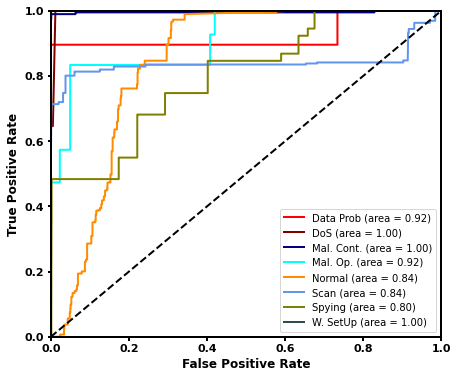

In [84]:
y_score = logR.predict_proba(X_test)
plot_roc_curve(y_score,y_test,name)

# Ridge Classifier


In [85]:
name = "RidgeClassifier"

from sklearn.linear_model import RidgeClassifier

ridge =  OneVsRestClassifier(RidgeClassifier())

ridge.fit(X_train, y_train) 
y_pred = ridge.predict(X_test)

add_results(name,y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy Score': 0.9821,
 'F1 Score': 0.9759,
 'Precision Score': 0.9705,
 'Recall Score': 0.9823}

In [86]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

       Data Probing       0.00      0.00      0.00        67
         DoS Attack       0.93      0.65      0.76      1121
  Malitious Control       0.00      0.00      0.00       187
Malitious Operation       0.00      0.00      0.00       150
             Normal       0.98      1.00      0.99     69630
               Scan       0.00      0.00      0.00       321
             Spying       0.00      0.00      0.00        91
        Wrong SetUp       0.00      0.00      0.00        22

          micro avg       0.98      0.98      0.98     71589
          macro avg       0.24      0.21      0.22     71589
       weighted avg       0.97      0.98      0.98     71589
        samples avg       0.98      0.98      0.98     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


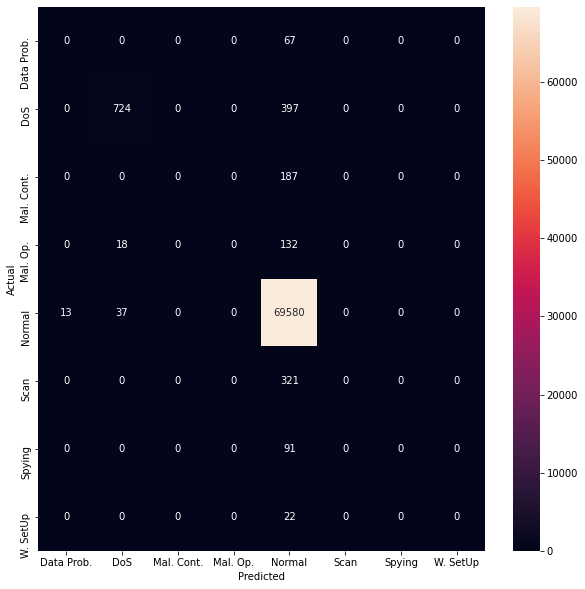

<Figure size 432x288 with 0 Axes>

In [87]:
plot_confusion_matrix(y_test, y_pred,name)

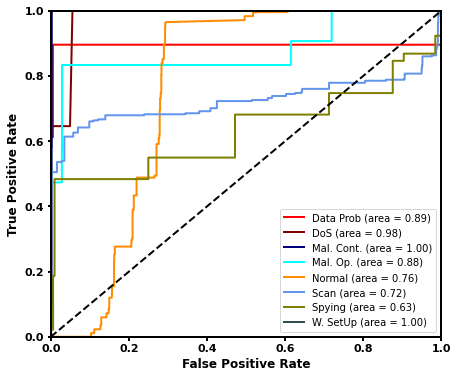

In [88]:
y_score = ridge.decision_function(X_test)
plot_roc_curve(y_score,y_test,name)

# SGD Classifier
**This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance. The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. Below is the decision boundary of a SGDClassifier trained with the hinge loss, equivalent to a linear SVM.**

Xu, Wei. (2011). Towards Optimal One Pass Large Scale Learning with Averaged Stochastic Gradient Descent. 

In [89]:
name = 'SGDClassifier'

from sklearn.linear_model import SGDClassifier

sgd =  OneVsRestClassifier(SGDClassifier())

sgd.fit(X_train, y_train) 
y_pred = sgd.predict(X_test)

add_results(name,y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy Score': 0.9797,
 'F1 Score': 0.9819,
 'Precision Score': 0.9806,
 'Recall Score': 0.9854}

In [90]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

       Data Probing       1.00      0.90      0.94        67
         DoS Attack       0.96      0.65      0.77      1121
  Malitious Control       0.88      0.42      0.57       187
Malitious Operation       1.00      0.47      0.64       150
             Normal       0.98      1.00      0.99     69630
               Scan       0.97      0.65      0.78       321
             Spying       0.00      0.00      0.00        91
        Wrong SetUp       0.00      0.00      0.00        22

          micro avg       0.98      0.99      0.98     71589
          macro avg       0.72      0.51      0.59     71589
       weighted avg       0.98      0.99      0.98     71589
        samples avg       0.98      0.99      0.98     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


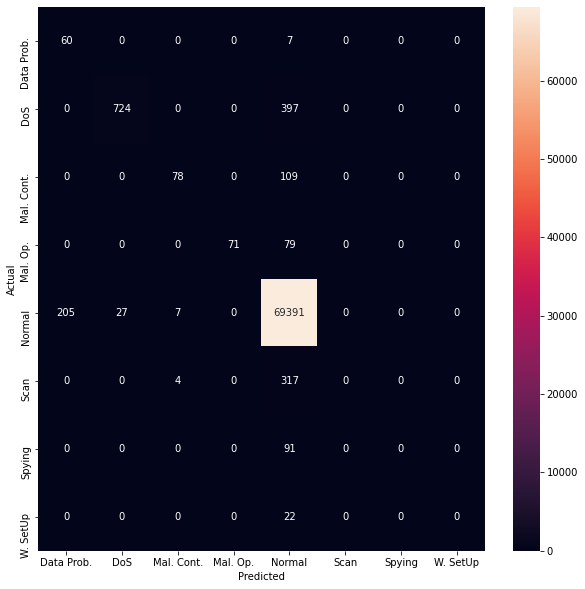

<Figure size 432x288 with 0 Axes>

In [91]:
plot_confusion_matrix(y_test, y_pred,name)

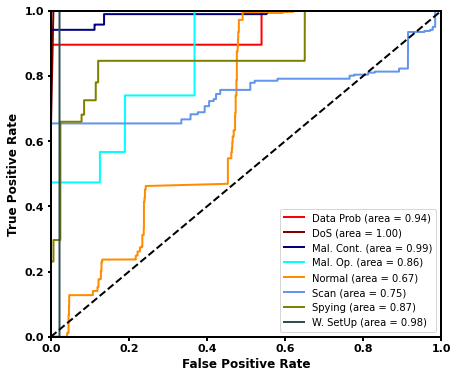

In [92]:
y_score = sgd.decision_function(X_test)
plot_roc_curve(y_score,y_test,name)

# Perceptron
**Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.Perceptron is a linear classifier (binary). Also, it is used in supervised learning. It helps to classify the given input data.A perceptron is like a single processing unit which can be used to form a linear classification/decision boundary between different classes.  perceptron is responsible to find a line of the form: WX + b = 0, where**


> X is dimension size vector which forms the variables (eg. X = [x1, x2]),
> W is the coefficient vector corresponding to each X (eg. W = [w1, w2]),
> b is a scalar bias value added to the line equation.


Hinton, Geoffrey E. “Connectionist learning procedures.” Artificial intelligence 40.1 (1989): 185-234.

In [93]:
name = "Perceptron"

from sklearn.linear_model import Perceptron

ptron =  OneVsRestClassifier(Perceptron(tol=1e-3, random_state=0))

ptron.fit(X_train, y_train) 
y_pred = ptron.predict(X_test)

add_results(name,y_test,y_pred)

{'Accuracy Score': 0.9683,
 'F1 Score': 0.9824,
 'Precision Score': 0.9751,
 'Recall Score': 0.992}

In [94]:
print(classification_report(y_test, y_pred,target_names=attack_class ))

                     precision    recall  f1-score   support

       Data Probing       1.00      0.61      0.76        67
         DoS Attack       0.58      1.00      0.73      1121
  Malitious Control       1.00      0.90      0.95       187
Malitious Operation       0.84      0.47      0.60       150
             Normal       0.98      1.00      0.99     69630
               Scan       0.81      0.64      0.72       321
             Spying       0.25      0.19      0.21        91
        Wrong SetUp       1.00      1.00      1.00        22

          micro avg       0.97      0.99      0.98     71589
          macro avg       0.81      0.73      0.75     71589
       weighted avg       0.98      0.99      0.98     71589
        samples avg       0.98      0.99      0.98     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


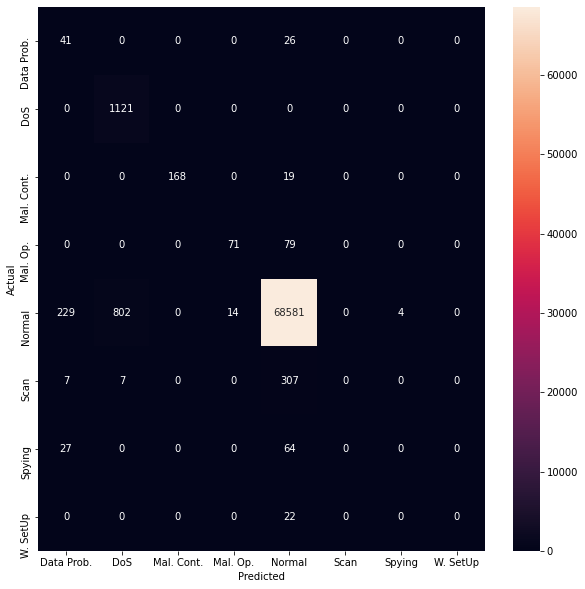

<Figure size 432x288 with 0 Axes>

In [95]:
plot_confusion_matrix(y_test, y_pred,name)

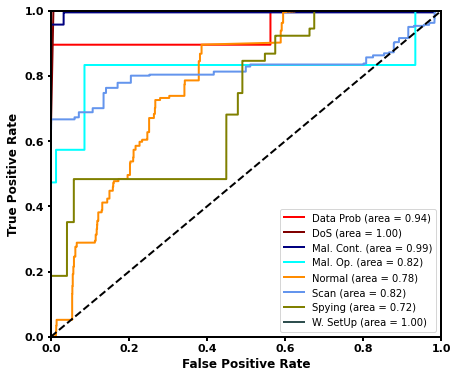

In [96]:
y_score = ptron.decision_function(X_test)
plot_roc_curve(y_score,y_test,name)

# Results 
The results shows compersion between all 13 algorithm used in this study. The 6 algorithm show more than 99% accuracy score. Where Naive Bias shows very poor accuracy score.

In [97]:
data = pd.DataFrame.from_dict(results).T
data.sort_values(by='Accuracy Score', ascending=True)

,Accuracy Score,Precision Score,Recall Score,F1 Score
GaussianNB,0.0004,0.9579,0.9823,0.9586
BernoulliNB,0.9604,0.9464,0.9750,0.9599
Perceptron,0.9683,0.9751,0.9920,0.9824
SGDClassifier,0.9797,0.9806,0.9854,0.9819
LinearSVC,0.9819,0.9812,0.9869,0.9820
RidgeClassifier,0.9821,0.9705,0.9823,0.9759
LogisticRegression,0.9823,0.9819,0.9879,0.9836
GradientBoostingClassifier,0.9916,0.9919,0.9937,0.9923
DecisionTreeClassifier,0.9942,0.9940,0.9942,0.9936
RandomForestClassifier,0.9942,0.9940,0.9942,0.9936
